<a href="https://colab.research.google.com/github/manashpratim/Sarcasm-Detection/blob/master/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading the dataset
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/30764/39238/Sarcasm_Headlines_Dataset.json.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561457285&Signature=iF0OFX3Y7%2FsA%2Frg2BhTIlg%2FfAu%2BsxT4cQnOAI%2BthZFO2iltMdBQop0TBuE1QRrN4n8J6jBi235F81nf6CJ%2FFkx7Fx3mc4o2imDoRIK%2FPGC6Go4B8pyf9W3McsglpUVfkWRO8RX3zeKUZmbUkd9aP0WoMbrYo2kF0Fw5FaOBjjWnfJZjk3UPqME4U7b2KB08e%2BQknBMBLFkOE65TtZEHWa056gI2JoE37riXx0G6qjyypiPTmjePahOUE4EtPbDRUp2vukU%2FHEp%2Bh%2BNI9yx%2FruiTKufvD%2FdhMO87AjW3esGFwr41fGNlKrFihOcPSzi0%2FiyEAAH%2F8My7X43G777Vijw%3D%3D"\
      -O "/tmp/sarcasm.zip"

--2019-06-22 13:03:11--  https://storage.googleapis.com/kaggle-datasets/30764/39238/Sarcasm_Headlines_Dataset.json.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561457285&Signature=iF0OFX3Y7%2FsA%2Frg2BhTIlg%2FfAu%2BsxT4cQnOAI%2BthZFO2iltMdBQop0TBuE1QRrN4n8J6jBi235F81nf6CJ%2FFkx7Fx3mc4o2imDoRIK%2FPGC6Go4B8pyf9W3McsglpUVfkWRO8RX3zeKUZmbUkd9aP0WoMbrYo2kF0Fw5FaOBjjWnfJZjk3UPqME4U7b2KB08e%2BQknBMBLFkOE65TtZEHWa056gI2JoE37riXx0G6qjyypiPTmjePahOUE4EtPbDRUp2vukU%2FHEp%2Bh%2BNI9yx%2FruiTKufvD%2FdhMO87AjW3esGFwr41fGNlKrFihOcPSzi0%2FiyEAAH%2F8My7X43G777Vijw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1670880 (1.6M) [application/zip]
Saving to: ‘/tmp/sarcasm.zip’

/tmp/sarcasm.zip    100%[===================>]   1.59M  --.-KB/s    in 0.01s   

2019-06-22 13

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/sarcasm.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/sarcasm')
zip_ref.close()

In [0]:
#Opening the json file
import json
rows = []
for line in open('/tmp/sarcasm/Sarcasm_Headlines_Dataset.json', 'r'):
    rows.append(json.loads(line))

In [0]:
#Suffling the data and splitting the data into training and test sets 
import random
SPLIT_SIZE=0.9
suffled_set=random.sample(rows,len(rows))
train_length=int(len(suffled_set)*SPLIT_SIZE)
train_set=suffled_set[:train_length]
test_set=suffled_set[train_length:]

In [5]:
#Data Summary
print('Total length of the dataset: ',len(suffled_set))
print('Length of the Training dataset: ',len(train_set))
print('Length of the Test dataset: ',len(test_set))

Total length of the dataset:  26709
Length of the Training dataset:  24038
Length of the Test dataset:  2671


In [6]:
#Data Format
train_set[1000]

{'article_link': 'https://www.huffingtonpost.com/entry/vegas-baby-well-minus-our-babies_b_5684367.html',
 'headline': 'vegas, baby! (well, minus our babies)',
 'is_sarcastic': 0}

In [0]:
#This list is available at https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords=[ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [0]:
#Function to remove stopwords
def remove_stopwords(sentence):
  for word in stopwords:
    token=' '+word+' '
    sentence=sentence.replace(token,' ')
    sentence=sentence.replace('  ',' ')
  return sentence

In [0]:
#Function to get the plain text from the link of an article
def get_article(link):
  try:
    from bs4 import BeautifulSoup
    import urllib.request

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

    url = link

    headers={'User-Agent':user_agent,} 

    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    html= response.read()
    soup = BeautifulSoup(html)

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return ' '.join(text.split())
  except:
    return 'article not available'
    pass
  
 

In [0]:
#Function to separate the articles, headlines and labels from the data
def extract(array):
  
  #articles=[]
  headlines=[]
  labels=[]
  for i in range(len(array)):
    labels.append(array[i]['is_sarcastic'])
    headlines.append(remove_stopwords(array[i]['headline']))
    #articles.append(get_article(array[i]['article_link']))
  #return articles,headlines,labels
  return headlines,labels

In [0]:
#Extracting articles, headlines and labels from the data
#train_articles,train_headlines,train_labels=extract(train_set)
train_headlines,train_labels=extract(train_set)
#test_articles,test_headlines,test_labels=extract(test_set)
test_headlines,test_labels=extract(test_set)

In [0]:
#Preprocessing the training and test headlines for the word embedding
vocab_size = 10000
embedding_dim = 100
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_headlines)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences,maxlen=max_length)


In [0]:
#Building the CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#model.summary()

In [60]:
model.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])
num_epochs = 50
history=model.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

Train on 24038 samples, validate on 2671 samples
Epoch 1/50
24038/24038 [==============================] - 3s 142us/sample - loss: 0.6826 - acc: 0.5624 - val_loss: 0.6832 - val_acc: 0.5492
Epoch 2/50
24038/24038 [==============================] - 3s 115us/sample - loss: 0.6714 - acc: 0.5630 - val_loss: 0.6697 - val_acc: 0.5586
Epoch 3/50
24038/24038 [==============================] - 3s 116us/sample - loss: 0.6491 - acc: 0.6122 - val_loss: 0.6459 - val_acc: 0.6192
Epoch 4/50
24038/24038 [==============================] - 3s 118us/sample - loss: 0.6119 - acc: 0.6976 - val_loss: 0.6090 - val_acc: 0.6893
Epoch 5/50
24038/24038 [==============================] - 3s 114us/sample - loss: 0.5627 - acc: 0.7591 - val_loss: 0.5659 - val_acc: 0.7488
Epoch 6/50
24038/24038 [==============================] - 3s 113us/sample - loss: 0.5089 - acc: 0.8052 - val_loss: 0.5264 - val_acc: 0.7537
Epoch 7/50
24038/24038 [==============================] - 3s 110us/sample - loss: 0.4590 - acc: 0.8349 - val_lo

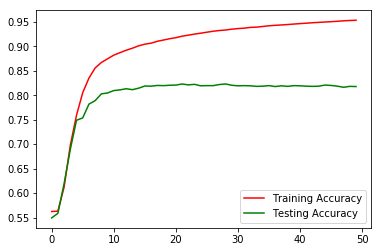

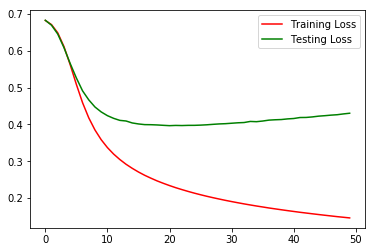

In [61]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()